In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.copy()
Y = numeros['target']
print(np.shape(X))

(1797, 8, 8)


In [3]:
inputs = torch.autograd.Variable(torch.Tensor(X).float()).unsqueeze(1)
print(inputs.size())

torch.Size([1797, 1, 8, 8])


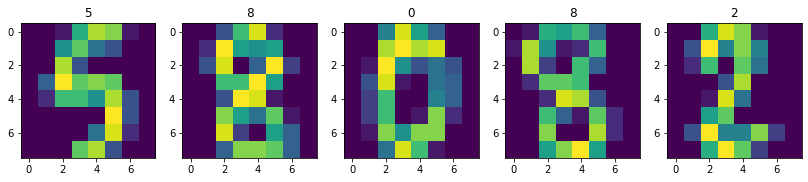

In [4]:
# muestra algunos ejemplos

n_items = inputs.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(inputs[item][0].detach().numpy())
    plt.title(Y[item])

In [5]:
# normaliza
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i])/std
np.shape(inputs)


torch.Size([1797, 1, 8, 8])

In [6]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3),
            torch.nn.Conv2d(16,8,kernel_size=3),
            torch.nn.Conv2d(8,4,kernel_size=3))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(4,8,kernel_size=3),
            torch.nn.ConvTranspose2d(8,16,kernel_size=3),
            torch.nn.ConvTranspose2d(16,1,kernel_size=3))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
# inicializa modelo, loss y optimizador
num_epochs = 400
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)

In [8]:
# entrenamiento
loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/400], loss:2.2352
epoch [2/400], loss:1.9329
epoch [3/400], loss:1.5677
epoch [4/400], loss:1.6641
epoch [5/400], loss:1.3948
epoch [6/400], loss:1.2977
epoch [7/400], loss:1.2898
epoch [8/400], loss:1.2385
epoch [9/400], loss:1.1446
epoch [10/400], loss:1.0684
epoch [11/400], loss:1.0757
epoch [12/400], loss:1.0755
epoch [13/400], loss:1.0061
epoch [14/400], loss:0.9678
epoch [15/400], loss:0.9668
epoch [16/400], loss:0.9658
epoch [17/400], loss:0.9510
epoch [18/400], loss:0.9273
epoch [19/400], loss:0.9049
epoch [20/400], loss:0.8912
epoch [21/400], loss:0.8850
epoch [22/400], loss:0.8784
epoch [23/400], loss:0.8646
epoch [24/400], loss:0.8458
epoch [25/400], loss:0.8313
epoch [26/400], loss:0.8229
epoch [27/400], loss:0.8154
epoch [28/400], loss:0.8050
epoch [29/400], loss:0.7935
epoch [30/400], loss:0.7850
epoch [31/400], loss:0.7802
epoch [32/400], loss:0.7744
epoch [33/400], loss:0.7643
epoch [34/400], loss:0.7536
epoch [35/400], loss:0.7475
epoch [36/400], loss:0.7445
e

epoch [288/400], loss:0.5038
epoch [289/400], loss:0.5037
epoch [290/400], loss:0.5035
epoch [291/400], loss:0.5033
epoch [292/400], loss:0.5031
epoch [293/400], loss:0.5030
epoch [294/400], loss:0.5028
epoch [295/400], loss:0.5026
epoch [296/400], loss:0.5025
epoch [297/400], loss:0.5023
epoch [298/400], loss:0.5021
epoch [299/400], loss:0.5019
epoch [300/400], loss:0.5018
epoch [301/400], loss:0.5016
epoch [302/400], loss:0.5015
epoch [303/400], loss:0.5013
epoch [304/400], loss:0.5011
epoch [305/400], loss:0.5010
epoch [306/400], loss:0.5008
epoch [307/400], loss:0.5006
epoch [308/400], loss:0.5005
epoch [309/400], loss:0.5003
epoch [310/400], loss:0.5002
epoch [311/400], loss:0.5000
epoch [312/400], loss:0.4999
epoch [313/400], loss:0.4997
epoch [314/400], loss:0.4996
epoch [315/400], loss:0.4994
epoch [316/400], loss:0.4993
epoch [317/400], loss:0.4991
epoch [318/400], loss:0.4990
epoch [319/400], loss:0.4988
epoch [320/400], loss:0.4987
epoch [321/400], loss:0.4986
epoch [322/400

In [9]:
x_transform = model(inputs)
latent_space = model.encoder(inputs)
print(latent_space.size())

torch.Size([1797, 4, 2, 2])


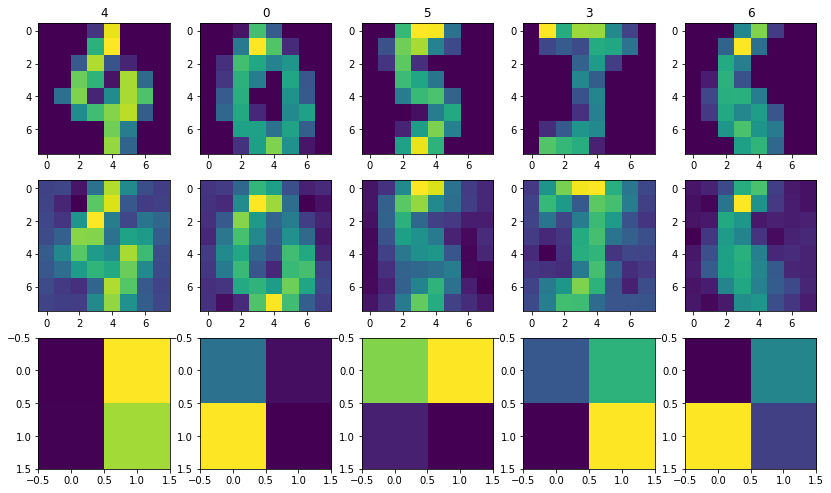

In [10]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 100
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow((inputs[i+offset][0].detach().numpy()))
    plt.title(Y[i+offset])
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][0].detach().numpy())
